# TUGAS 1
Modifikasi model CNN pada praktikum 2 sehingga didapatkan akurasi testing lebih dari 80%.

**Import Library**

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, utils, models, callbacks
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

**Load Dataset**

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

X_train = X_train / 255.0
X_test = X_test / 255.0

**One-Hot Encoding of Labels**

In [3]:
y_cat_train = utils.to_categorical(y_train, 10)
y_cat_test = utils.to_categorical(y_test, 10)

**Build Model**

In [4]:
INPUT_SHAPE = (32, 32, 3)
KERNEL_SIZE = (3, 3)
model = models.Sequential()

# Convolutional Layer
model.add(layers.Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=32, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
# Pooling layer
model.add(layers.MaxPool2D(pool_size=(2, 2)))
# Dropout layers
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=64, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(filters=128, kernel_size=KERNEL_SIZE, input_shape=INPUT_SHAPE, activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
# model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

**Compile Model**

In [5]:
METRICS = [
    'accuracy',
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=METRICS)

**Train Model**

In [6]:
batch_size = 32
data_generator = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(X_train, y_cat_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size

r = model.fit(train_generator,
               epochs=50,
               steps_per_epoch=steps_per_epoch,
               validation_data=(X_test, y_cat_test))

Epoch 1/50
1562/1562 [==============================] - 194s 123ms/step - loss: 1.6579 - accuracy: 0.3952 - precision: 0.6102 - recall: 0.1775 - val_loss: 1.4219 - val_accuracy: 0.4846 - val_precision: 0.6239 - val_recall: 0.3192
Epoch 2/50
1562/1562 [==============================] - 171s 109ms/step - loss: 1.2462 - accuracy: 0.5556 - precision: 0.7240 - recall: 0.3862 - val_loss: 1.3799 - val_accuracy: 0.5358 - val_precision: 0.6757 - val_recall: 0.4206
Epoch 3/50
1562/1562 [==============================] - 183s 117ms/step - loss: 1.0554 - accuracy: 0.6333 - precision: 0.7738 - recall: 0.5017 - val_loss: 0.9507 - val_accuracy: 0.6714 - val_precision: 0.7738 - val_recall: 0.5781
Epoch 4/50
1562/1562 [==============================] - 194s 124ms/step - loss: 0.9380 - accuracy: 0.6740 - precision: 0.7927 - recall: 0.5602 - val_loss: 0.8622 - val_accuracy: 0.7140 - val_precision: 0.8065 - val_recall: 0.6223
Epoch 5/50
1562/1562 [==============================] - 190s 122ms/step - loss: 

**Evaluate Model**

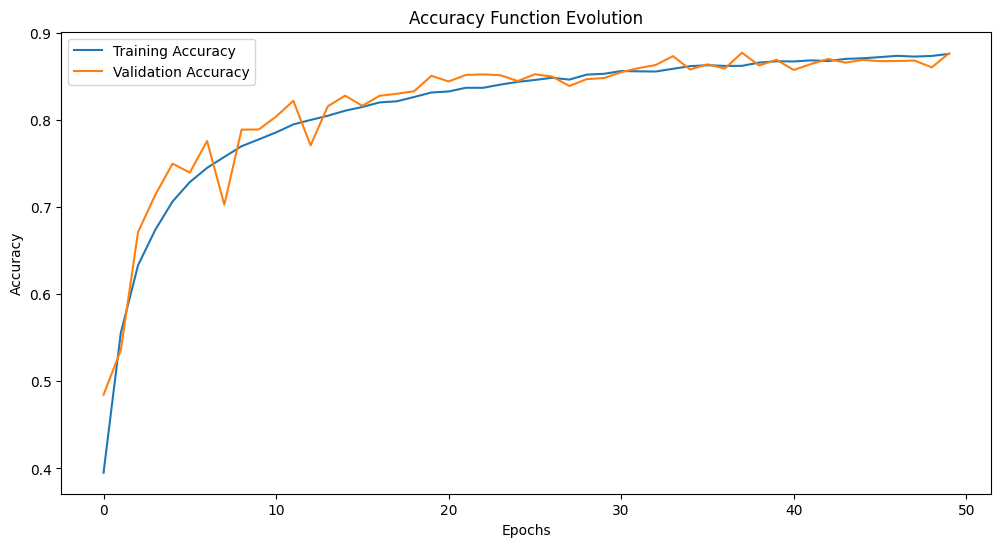

313/313 [==============================] - 9s 28ms/step - loss: 0.3730 - accuracy: 0.8765 - precision: 0.9030 - recall: 0.8572
Test Accuracy: 87.65%


In [7]:
plt.figure(figsize=(12, 6))

plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Function Evolution')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# Evaluate the model on test data
evaluation = model.evaluate(X_test, y_cat_test)
print(f'Test Accuracy: {evaluation[1] * 100:.2f}%')